<a href="https://colab.research.google.com/github/Haxxanali012/DataScienceAnalytics/blob/main/Lab9_20sw012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: M Hassan**

**Roll No: 20sw012**

**Section: ii**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import numpy as np
import json
from bs4 import BeautifulSoup
from collections import defaultdict
from sklearn.linear_model import LinearRegression
import sqlite3
from sqlalchemy import create_engine
import requests



In [ ]:
df_rural = pd.read_csv('/content/rural_population_percent.csv', skiprows=4)
df_electricity = pd.read_csv('/content/electricity_access_percent.csv', skiprows=4)
df_rural.drop('Unnamed: 62', axis=1, inplace=True)
df_electricity.drop('Unnamed: 62', axis=1, inplace=True)

df = pd.concat([df_rural, df_electricity])
pd.concat

<function pandas.core.reshape.concat.concat(objs: 'Iterable[NDFrame] | Mapping[HashableT, NDFrame]', *, axis: 'Axis' = 0, join: 'str' = 'outer', ignore_index: 'bool' = False, keys=None, levels=None, names=None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool' = True) -> 'DataFrame | Series'>

In [ ]:
df_rural_melt = pd.melt(df_rural,\
                        id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],\
                       var_name = 'Year', value_name='Rural_Value')
df_electricity_melt = pd.melt(df_electricity,\
                              id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],\
                             var_name='Year', value_name='Electricity_Value')
df_rural_melt.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)
df_electricity_melt.drop(['Indicator Name', 'Indicator Code'], axis=1, inplace=True)
df_merge = df_rural_melt.merge(df_electricity_melt, how='outer',\
                               on=['Country Name', 'Country Code', 'Year'])
df_combined = df_merge.sort_values(['Country Name', 'Year'])
df_combined

,Country Name,Country Code,Year,Rural_Value,Electricity_Value
1,Afghanistan,AFG,1960,91.779,NaN
265,Afghanistan,AFG,1961,91.492,NaN
529,Afghanistan,AFG,1962,91.195,NaN
793,Afghanistan,AFG,1963,90.890,NaN
1057,Afghanistan,AFG,1964,90.574,NaN
...,...,...,...,...,...
14255,Zimbabwe,ZWE,2013,67.346,37.076813
14519,Zimbabwe,ZWE,2014,67.499,32.300000
14783,Zimbabwe,ZWE,2015,67.624,33.700000
15047,Zimbabwe,ZWE,2016,67.723,38.145138


In [ ]:
df_projects = pd.read_csv('/content/projects_data.csv')
df_projects = pd.read_csv('/content/projects_data.csv', dtype=str)
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [ ]:
df_projects.isnull().sum()

id                             0
regionname                     0
countryname                    0
prodline                       0
lendinginstr                 116
lendinginstrtype             117
envassesmentcategorycode    1236
supplementprojectflg          53
productlinetype                1
projectstatusdisplay           4
status                         4
project_name                   1
boardapprovaldate              1
board_approval_month           1
closingdate                 1446
lendprojectcost              112
ibrdcommamt                    1
idacommamt                     1
totalamt                       1
grantamt                       1
borrower                     811
impagency                   1054
url                            1
projectdoc                  8245
majorsector_percent         8245
sector1                        1
sector2                     2217
sector3                     4111
sector4                     5493
sector5                     6591
sector    

In [ ]:
df_projects.shape

(8245, 57)

In [ ]:
f = open('/content/population_data.csv')
for i in range(10):
    line = f.readline()
    print('line: ', i,  line)
f.close()


line:  0 ﻿"Data Source","World Development Indicators",

line:  1 

line:  2 "Last Updated Date","2018-06-28",

line:  3 

line:  4 "Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017",

line:  5 "Aruba","ABW","Population, total","SP.POP.TOTL","54211","55438","56225","56695","57032","57360","57715","58055","58386","58726","59063","59440","59840","60243","60528","60657","60586","60366","60103","59980","60096","60567","61345","62201","62836","63026","62644","61833","61079","61032","62149","64622","68235","72504","76700","80324","83200","85451","87277","89005","90853","92898","94

In [ ]:
df_population = pd.read_csv('/content/population_data.csv', skiprows=4)
df_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [ ]:
df_population.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                4
                 ... 
2014                2
2015                2
2016                2
2017                2
Unnamed: 62       264
Length: 63, dtype: int64

In [ ]:
df_population.isnull().sum(axis=1)

0      1
1      1
2      1
3      1
4      1
      ..
259    1
260    1
261    1
262    1
263    1
Length: 264, dtype: int64

In [ ]:
df_population.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'],
      dtype='object')

In [ ]:
df_population[df_population.isnull().any(axis=1)]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0,NaN


In [ ]:
df = pd.read_csv('/content/gdp_data.csv', skiprows=4)
df.drop('Unnamed: 62', axis=1, inplace=True)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [ ]:
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

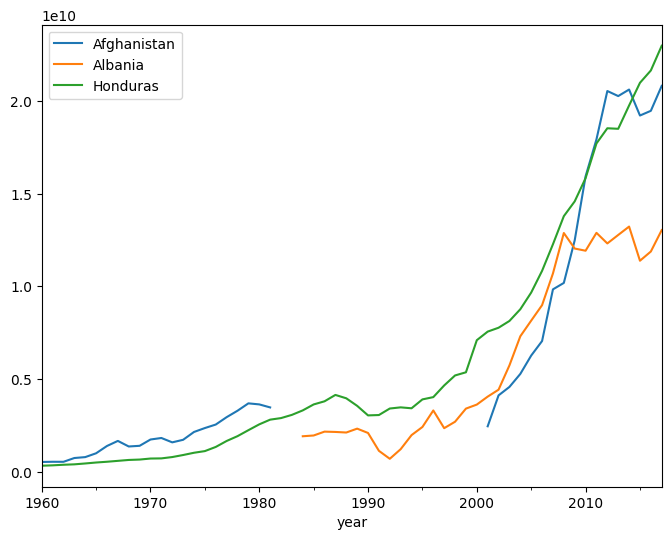

In [ ]:

df_melt = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='GDP')
df_melt['year'] = pd.to_datetime(df_melt['year'])

def plot_results(column_name):
    fig, ax = plt.subplots(figsize=(8,6))

    df_melt[(df_melt['Country Name'] == 'Afghanistan') |
            (df_melt['Country Name'] == 'Albania') |
            (df_melt['Country Name'] == 'Honduras')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Afghanistan', 'Albania', 'Honduras'])

plot_results('GDP')

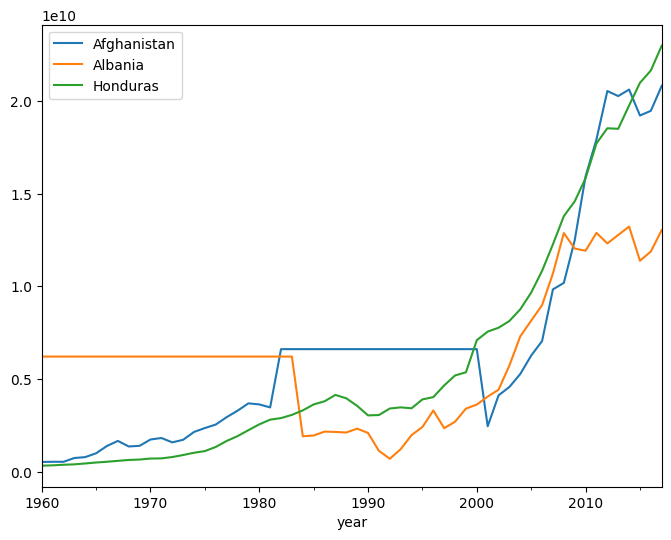

In [ ]:
df_melt['GDP_filled'] = df_melt.groupby('Country Name')['GDP'].transform(lambda x: x.fillna(x.mean()))
plot_results('GDP_filled')

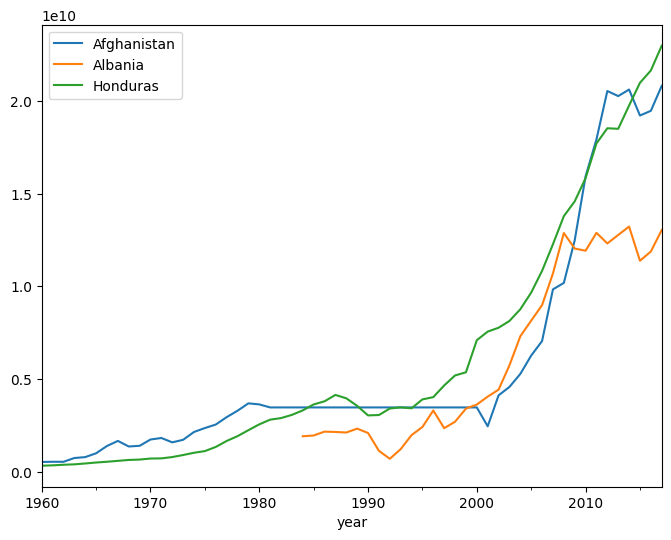

In [ ]:

df_melt['GDP_ffill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill')
plot_results('GDP_ffill')

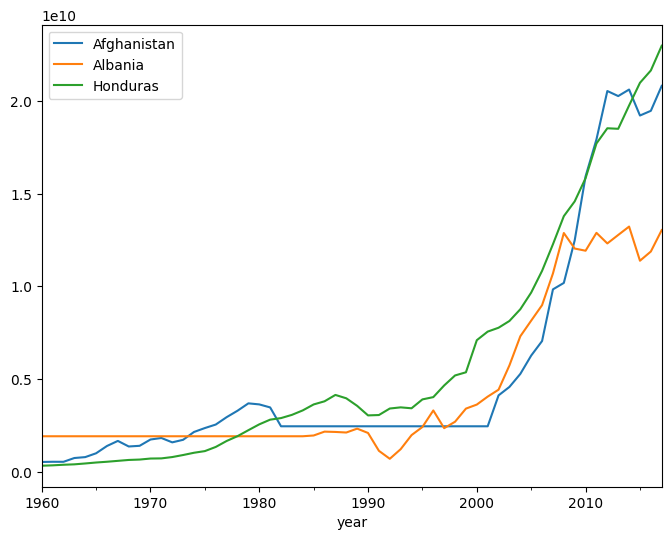

In [ ]:
df_melt['GDP_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='bfill')
plot_results('GDP_bfill')

In [ ]:
df_melt['GDP_ff_bf'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill').fillna(method='bfill')
df_melt['GDP_ff_bf'].isnull().sum()

0

In [ ]:
projects = pd.read_csv('/content/projects_data.csv', dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)
projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])
projects[projects['totalamt'] > 1000000000]['countryname'].nunique()

14

In [ ]:
projects[projects['countryname'].str.contains('Yugoslavia')]

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country


In [ ]:
projects['boardapprovaldate'].head()

0   2018-06-28 00:00:00+00:00
1   2018-06-28 00:00:00+00:00
2   2018-06-28 00:00:00+00:00
3   2018-06-27 00:00:00+00:00
4   2018-06-27 00:00:00+00:00
Name: boardapprovaldate, dtype: datetime64[ns, UTC]

In [ ]:
republics = projects[(projects['boardapprovaldate'] < '1993-04-27 00:00:00+00:00') &
         ((projects['countryname'].str.contains('Bosnia')) |
         (projects['countryname'].str.contains('Croatia')) |
         (projects['countryname'].str.contains('Kosovo')) |
         (projects['countryname'].str.contains('Macedonia')) |
         (projects['countryname'].str.contains('Montenegro')) |
         (projects['countryname'].str.contains('Serbia')) |
         (projects['countryname'].str.contains('Slovenia')))][['regionname',
                                                                   'countryname',
                                                                   'lendinginstr',
                                                                   'totalamt',
                                                                   'boardapprovaldate',
                                                               'location',
                                                               'GeoLocID',
                                                               'GeoLocName',
                                                               'Latitude',
                                                               'Longitude',
                                                               'Country',
                                                               'project_name']].sort_values('boardapprovaldate')

republics

,regionname,countryname,lendinginstr,totalamt,boardapprovaldate,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,project_name


import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_0, *['index', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_1, *['totalamt', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_2, *['boardapprovaldate', 'count()', None], **{})
chart

In [ ]:

def print_lines(n, file_name):
    f = open(file_name)
    for i in range(n):
        print(f.readline())
    f.close()

print_lines(1, '/content/population_data.json')

[{"Country Name":"Aruba","Country Code":"ABW","Indicator Name":"Population, total","Indicator Code":"SP.POP.TOTL","1960":54211.0,"1961":55438.0,"1962":56225.0,"1963":56695.0,"1964":57032.0,"1965":57360.0,"1966":57715.0,"1967":58055.0,"1968":58386.0,"1969":58726.0,"1970":59063.0,"1971":59440.0,"1972":59840.0,"1973":60243.0,"1974":60528.0,"1975":60657.0,"1976":60586.0,"1977":60366.0,"1978":60103.0,"1979":59980.0,"1980":60096.0,"1981":60567.0,"1982":61345.0,"1983":62201.0,"1984":62836.0,"1985":63026.0,"1986":62644.0,"1987":61833.0,"1988":61079.0,"1989":61032.0,"1990":62149.0,"1991":64622.0,"1992":68235.0,"1993":72504.0,"1994":76700.0,"1995":80324.0,"1996":83200.0,"1997":85451.0,"1998":87277.0,"1999":89005.0,"2000":90853.0,"2001":92898.0,"2002":94992.0,"2003":97017.0,"2004":98737.0,"2005":100031.0,"2006":100832.0,"2007":101220.0,"2008":101353.0,"2009":101453.0,"2010":101669.0,"2011":102053.0,"2012":102577.0,"2013":103187.0,"2014":103795.0,"2015":104341.0,"2016":104822.0,"2017":105264.0},{"

In [ ]:
with open('/content/population_data.json') as f:
    json_data = json.load(f)
print(json_data[0])
print('\n')
print(json_data[0]['Country Name'])
print(json_data[0]['Country Code'])

{'Country Name': 'Aruba', 'Country Code': 'ABW', 'Indicator Name': 'Population, total', 'Indicator Code': 'SP.POP.TOTL', '1960': 54211.0, '1961': 55438.0, '1962': 56225.0, '1963': 56695.0, '1964': 57032.0, '1965': 57360.0, '1966': 57715.0, '1967': 58055.0, '1968': 58386.0, '1969': 58726.0, '1970': 59063.0, '1971': 59440.0, '1972': 59840.0, '1973': 60243.0, '1974': 60528.0, '1975': 60657.0, '1976': 60586.0, '1977': 60366.0, '1978': 60103.0, '1979': 59980.0, '1980': 60096.0, '1981': 60567.0, '1982': 61345.0, '1983': 62201.0, '1984': 62836.0, '1985': 63026.0, '1986': 62644.0, '1987': 61833.0, '1988': 61079.0, '1989': 61032.0, '1990': 62149.0, '1991': 64622.0, '1992': 68235.0, '1993': 72504.0, '1994': 76700.0, '1995': 80324.0, '1996': 83200.0, '1997': 85451.0, '1998': 87277.0, '1999': 89005.0, '2000': 90853.0, '2001': 92898.0, '2002': 94992.0, '2003': 97017.0, '2004': 98737.0, '2005': 100031.0, '2006': 100832.0, '2007': 101220.0, '2008': 101353.0, '2009': 101453.0, '2010': 101669.0, '2011'

In [ ]:
print_lines(15, '/content/population_data.xml')

﻿<?xml version="1.0" encoding="utf-8"?>

<Root xmlns:wb="http://www.worldbank.org">

  <data>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1960</field>

      <field name="Value">54211</field>

    </record>

    <record>

      <field name="Country or Area" key="ABW">Aruba</field>

      <field name="Item" key="SP.POP.TOTL">Population, total</field>

      <field name="Year">1961</field>

      <field name="Value">55438</field>

    </record>



In [ ]:
from bs4 import BeautifulSoup
with open("/content/population_data.xml") as fp:
    soup = BeautifulSoup(fp, "lxml")
i = 0
for record in soup.find_all('record'):
    i += 1
    for record in record.find_all('field'):
        print(record['name'], ': ' , record.text)
    print()
    if i == 5:
        break

Country or Area :  Aruba
Item :  Population, total
Year :  1960
Value :  54211

Country or Area :  Aruba
Item :  Population, total
Year :  1961
Value :  55438

Country or Area :  Aruba
Item :  Population, total
Year :  1962
Value :  56225

Country or Area :  Aruba
Item :  Population, total
Year :  1963
Value :  56695

Country or Area :  Aruba
Item :  Population, total
Year :  1964
Value :  57032



In [ ]:

data_dictionary = {'Country or Area':[], 'Year':[], 'Item':[], 'Value':[]}

for record in soup.find_all('record'):
    for record in record.find_all('field'):
        data_dictionary[record['name']].append(record.text)

df = pd.DataFrame.from_dict(data_dictionary)
df = df.pivot(index='Country or Area', columns='Year', values='Value')
df.reset_index(level=0, inplace=True)
df.head()

Year,Country or Area,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,8996351,9166764,9345868,9533954,9731361,9938414,10152331,10372630,10604346,...,27294031,28004331,28803167,29708599,30696958,31731688,32758020,33736494,34656032,35530081
1,Albania,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,2022272,...,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457
2,Algeria,11124888,11404859,11690153,11985136,12295970,12626952,12980267,13354197,13744387,...,34860715,35465760,36117637,36819558,37565847,38338562,39113313,39871528,40606052,41318142
3,American Samoa,20013,20486,21117,21882,22698,23520,24321,25116,25885,...,57030,56227,55637,55320,55230,55307,55437,55537,55599,55641
4,Andorra,13411,14375,15370,16412,17469,18549,19647,20758,21890,...,83861,84462,84449,83751,82431,80788,79223,78014,77281,76965


In [ ]:
df_indicator = pd.read_csv('/content/population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)
df_projects = pd.read_csv('/content/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)
df_indicator[['Country Name', 'Country Code']].drop_duplicates()

,Country Name,Country Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Albania,ALB
4,Andorra,AND
...,...,...
259,Kosovo,XKX
260,"Yemen, Rep.",YEM
261,South Africa,ZAF
262,Zambia,ZMB


In [ ]:

df_projects['Official Country Name'] = df_projects['countryname'].str.split(';').str.get(0)
!pip install pycountry
from pycountry import countries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 18.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=eebdfba43cb5b6798e82d7561cbe8a9ec3fa222befcf09e7f9a6bd0937fb9bfb
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [ ]:
countries.get(name='Spain')

Country(alpha_2='ES', alpha_3='ESP', flag='🇪🇸', name='Spain', numeric='724', official_name='Kingdom of Spain')

In [ ]:
from collections import defaultdict
country_not_found = []
project_country_abbrev_dict = defaultdict(str)
for country in df_projects['Official Country Name'].drop_duplicates().sort_values():
    try:
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        print(country, ' not found')
        country_not_found.append(country)

Africa  not found
Andean Countries  not found
Asia  not found
Caribbean  not found
Caucasus  not found
Central Africa  not found
Central America  not found
Central Asia  not found
Co-operative Republic of Guyana  not found
Democratic Republic of Sao Tome and Prin  not found
Democratic Republic of the Congo  not found
Democratic Socialist Republic of Sri Lan  not found
East Asia and Pacific  not found
Eastern Africa  not found
Europe and Central Asia  not found
Islamic  Republic of Afghanistan  not found
Kingdom of Swaziland  not found
Latin America  not found
Macedonia  not found
Mekong  not found
Mercosur  not found
Middle East and North Africa  not found
Multi-Regional  not found
Organization of Eastern Caribbean States  not found
Oriental Republic of Uruguay  not found
Pacific Islands  not found
Republic of Congo  not found
Republic of Cote d'Ivoire  not found
Republic of Korea  not found
Republic of Kosovo  not found
Republic of Niger  not found
Republic of Rwanda  not found
Republ

In [ ]:

country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}


In [ ]:
project_country_abbrev_dict.update(country_not_found_mapping)

In [ ]:

df_projects['Country Code'] = df_projects['Official Country Name'].apply(lambda x: project_country_abbrev_dict[x])
df_projects[df_projects['Country Code'] == '']

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Official Country Name,Country Code
31,P166648,Africa,Central Africa;Central Africa,RE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Africa,
39,P163752,Africa,Africa;Africa,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,
58,P164728,Africa,Africa;Africa,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,
69,P161329,Africa,Western Africa;Western Africa,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Western Africa,
103,P164468,East Asia and Pacific,Pacific Islands;Pacific Islands,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,0002134431!$!Republic of Vanuatu!$!-16!$!167!$...,0002134431;0002135171,Republic of Vanuatu;Port-Vila,-16;-17.73381,167;168.32188,VU;VU,Pacific Islands,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,P073939,Africa,Africa;Africa,RE,Technical Assistance Loan,IN,C,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,
8109,P076209,Africa,Africa;Africa,RE,Technical Assistance Loan,IN,C,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,
8114,P076827,Africa,Africa;Africa,RE,Technical Assistance Loan,IN,C,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,
8180,P087666,Africa,Africa;Africa,RE,Learning and Innovation Loan,IN,A,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,


In [ ]:
df_indicator = pd.read_csv('/content/population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)
df_projects = pd.read_csv('/content/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)
# Run this code cell
df_indicator.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 62, dtype: object

In [ ]:
keepcol = ['Country Name']
for i in range(1960, 2018, 1):
    keepcol.append(str(i))

df_nafta = df_indicator[(df_indicator['Country Name'] == 'Canada') |
             (df_indicator['Country Name'] == 'United States') |
            (df_indicator['Country Name'] == 'Mexico')].iloc[:,]

df_nafta.sum(axis=0)[keepcol]

Country Name    CanadaMexicoUnited States
1960                          236754121.0
1961                          241356126.0
1962                          245801588.0
1963                          250145880.0
1964                          254478272.0
1965                          258604043.0
1966                          262619038.0
1967                          266553812.0
1968                          270344019.0
1969                          274128481.0
1970                          278405861.0
1971                          283025259.0
1972                          287367782.0
1973                          291558995.0
1974                          295716280.0
1975                          300054399.0
1976                          304176763.0
1977                          308380884.0
1978                          312660488.0
1979                          317041689.0
1980                          321178871.0
1981                          325358195.0
1982                          3294

In [ ]:
df_projects.dtypes

id                          object
regionname                  object
countryname                 object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
url                         object
projectdoc                  object
majorsector_percent         object
sector1                     object
sector2                     object
sector3                     object
sector4             

In [ ]:
df_projects[['totalamt', 'lendprojectcost']].head()

,totalamt,lendprojectcost
0,0,"500,000"
1,"200,000,000","200,000,000"
2,"58,330,000","50,000,000"
3,"20,000,000","50,000,000"
4,"100,000,000","100,000,000"


In [ ]:
df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',""))
df_projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG


In [ ]:
gdp = pd.read_csv('/content/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('/content/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
gdp_melt = gdp.melt(id_vars=['Country Name'],
                    var_name='year',
                    value_name='gdp')
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')
population_melt = population.melt(id_vars=['Country Name'],
                                  var_name='year',
                                  value_name='population')

population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))
df_2016 = df_country[df_country['year'] == '2016']
df_2016.head(10)


,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14789,Arab World,2016,2.500164e+12,406452690.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0


<Axes: >

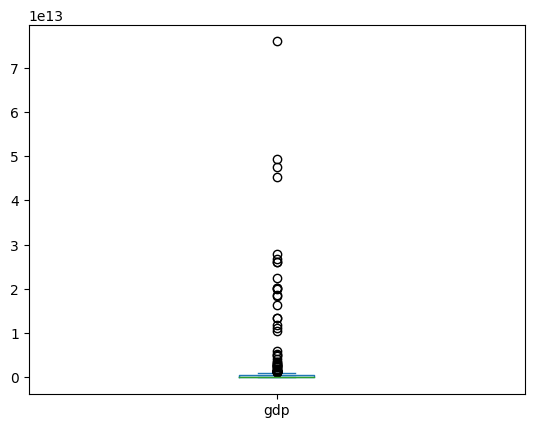

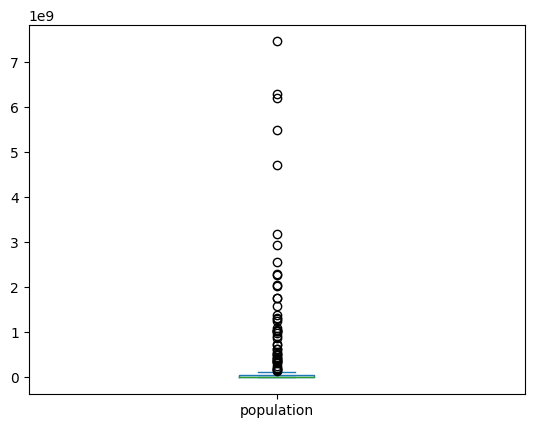

In [ ]:
df_2016.plot('population', kind='box')
df_2016.plot('gdp', kind='box')

In [ ]:
population_2016 = df_2016[['Country Name','population']]
Q1 = population_2016['population'].quantile(0.25)
Q3 = population_2016['population'].quantile(0.75)
IQR = Q3 - Q1
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR
population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

,Country Name,population
14789,Arab World,4.064527e+08
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14843,East Asia & Pacific (excluding high income),2.053299e+09
14844,Early-demographic dividend,3.170658e+09
14845,East Asia & Pacific,2.298727e+09
14846,Europe & Central Asia (excluding high income),4.132349e+08
14847,Europe & Central Asia,9.116863e+08
14850,Euro area,3.406174e+08


In [ ]:
gdp_2016 = df_2016[['Country Name','gdp']]
Q1 = gdp_2016['gdp'].quantile(0.25)
Q3 = gdp_2016['gdp'].quantile(0.75)
IQR = Q3 - Q1
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR
gdp_outliers = gdp_2016[(gdp_2016['gdp'] > max_value) | (gdp_2016['gdp'] < min_value)]
gdp_outliers

,Country Name,gdp
14789,Arab World,2.500164e+12
14795,Australia,1.208039e+12
14811,Brazil,1.793989e+12
14817,Canada,1.535768e+12
14818,Central Europe and the Baltics,1.313067e+12
14822,China,1.119099e+13
14837,Germany,3.477796e+12
14843,East Asia & Pacific (excluding high income),1.350933e+13
14844,Early-demographic dividend,1.043743e+13
14845,East Asia & Pacific,2.251217e+13


In [ ]:
list(set(population_outliers['Country Name']).intersection(gdp_outliers['Country Name']))

['Europe & Central Asia (excluding high income)',
 'IBRD only',
 'East Asia & Pacific (IDA & IBRD countries)',
 'OECD members',
 'Sub-Saharan Africa (excluding high income)',
 'North America',
 'Sub-Saharan Africa',
 'Arab World',
 'Late-demographic dividend',
 'World',
 'China',
 'Middle East & North Africa',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Euro area',
 'Pre-demographic dividend',
 'Upper middle income',
 'Post-demographic dividend',
 'India',
 'South Asia',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'United States',
 'Russian Federation',
 'Europe & Central Asia (IDA & IBRD countries)',
 'East Asia & Pacific',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'South Asia (IDA & IBRD)',
 'High income',
 'Low & middle income',
 'Europe & Central Asia',
 'IDA total',
 'Early-demographic dividend',
 'IDA & IBRD total',
 'Lower middle income',
 'Brazil',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & the Caribbean (IDA

In [ ]:
list(set(gdp_outliers['Country Name']) - set(population_outliers['Country Name']))

['United Kingdom',
 'Korea, Rep.',
 'Central Europe and the Baltics',
 'France',
 'Spain',
 'Canada',
 'Japan',
 'Australia',
 'Germany',
 'Italy']

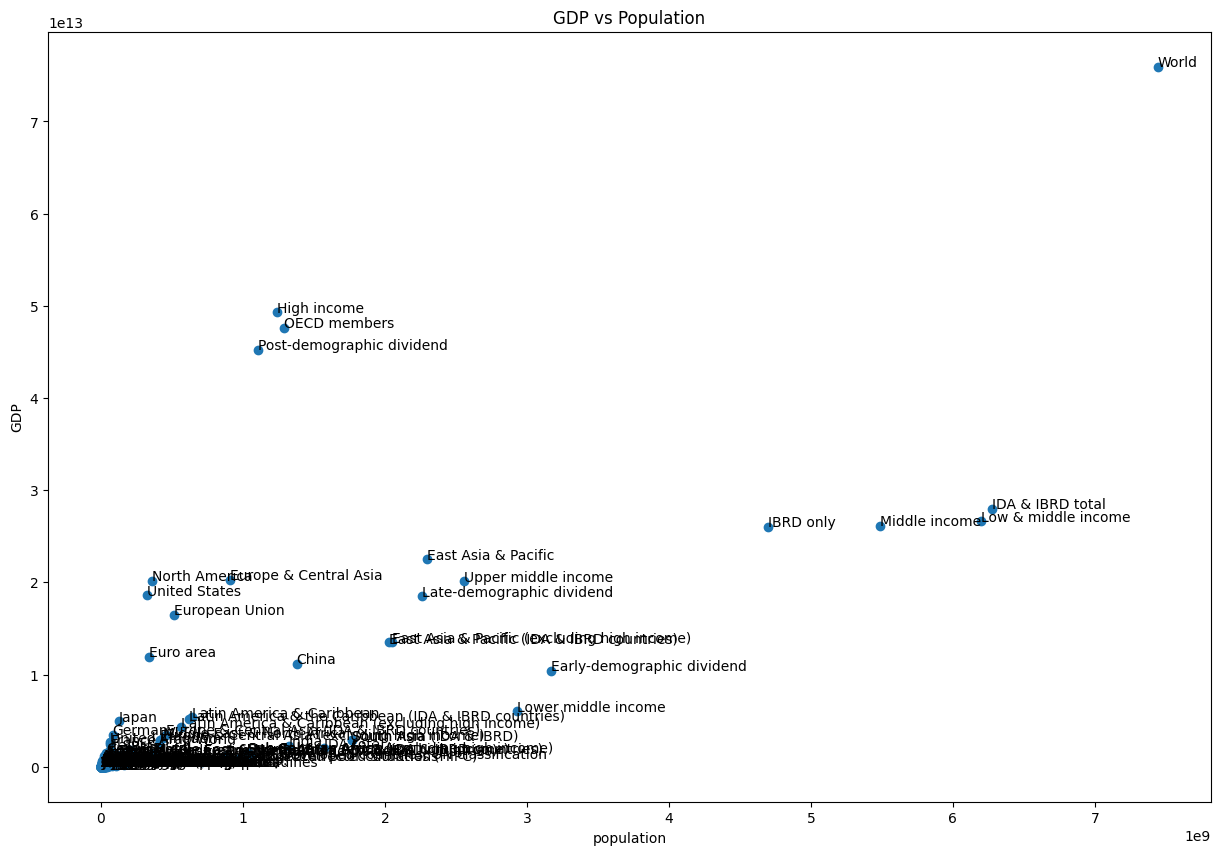

In [ ]:
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

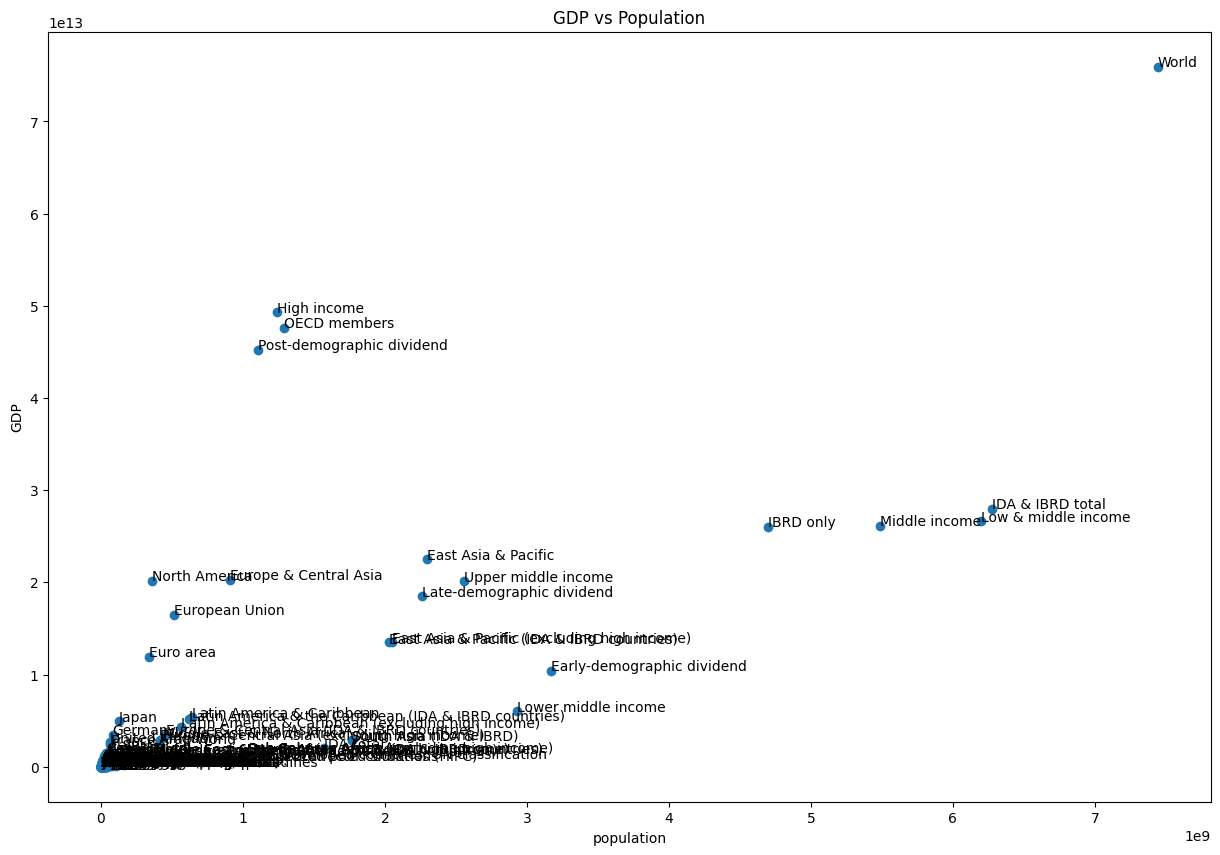

In [ ]:
df_no_large = (df_2016['Country Name'] != 'United States') & (df_2016['Country Name'] != 'India') & (df_2016['Country Name'] != 'China')
x = list(df_2016[df_no_large]['population'])
y = list(df_2016[df_no_large]['gdp'])
text = df_2016[df_no_large]['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

[[6.90105899e+12]]


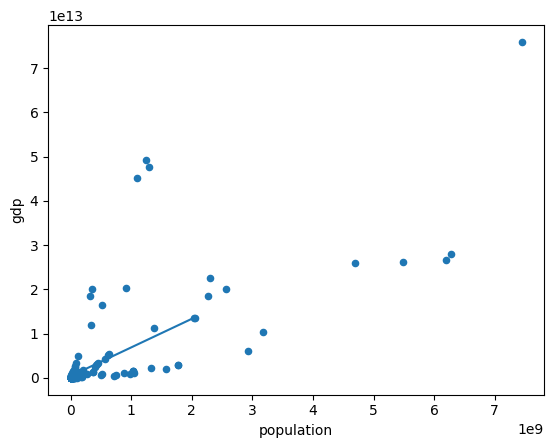

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df_2016['population'].values.reshape(-1, 1), df_2016['gdp'].values.reshape(-1, 1))
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))

df_2016.plot('population', 'gdp', kind='scatter')
plt.plot(inputs, predictions)
print(model.predict([[1000000000]]))

[[6.83863148e+12]]


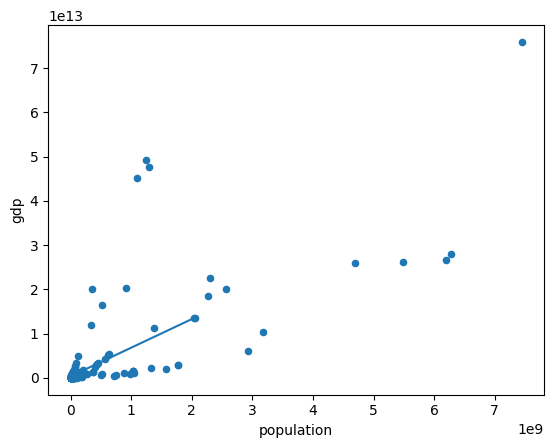

In [ ]:
df_2016[df_2016['Country Name'] != 'United States'].plot('population', 'gdp', kind='scatter')
# plt.plot(inputs, predictions)
model.fit(df_2016[df_2016['Country Name'] != 'United States']['population'].values.reshape(-1, 1),
          df_2016[df_2016['Country Name'] != 'United States']['gdp'].values.reshape(-1, 1))
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))
plt.plot(inputs, predictions)
print(model.predict([[1000000000]]))

In [ ]:
conn = sqlite3.connect('/content/population_data.db')
pd.read_sql('SELECT * FROM population_data', conn)

,index,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [ ]:
pd.read_sql('SELECT "Country_Name", "Country_Code", "1960" FROM population_data', conn)

,Country_Name,Country_Code,1960
0,Aruba,ABW,54211.0
1,Afghanistan,AFG,8996351.0
2,Angola,AGO,5643182.0
3,Albania,ALB,1608800.0
4,Andorra,AND,13411.0
...,...,...,...
259,Kosovo,XKX,947000.0
260,"Yemen, Rep.",YEM,5172135.0
261,South Africa,ZAF,17456855.0
262,Zambia,ZMB,3044846.0


In [ ]:
url = 'http://api.worldbank.org/v2/countries/br;cn;us;de/indicators/SP.POP.TOTL/?format=json&per_page=1000'
r = requests.get(url)
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 1000,
  'total': 252,
  'sourceid': '2',
  'lastupdated': '2023-09-19'},
 [{'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2022',
   'value': 215313498,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2021',
   'value': 214326223,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2020',
   'value': 213196304,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.POP.TOTL', 'value': 'Population, total'},
   'country': {'id': 'BR', 'value': 'Brazil'},
   'countryiso3code': 'BRA',
   'date': '2019',

In [ ]:
pd.DataFrame(r.json()[1])

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2022,215313498,,,0
1,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2021,214326223,,,0
2,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2020,213196304,,,0
3,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2019,211782878,,,0
4,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'BR', 'value': 'Brazil'}",BRA,2018,210166592,,,0
...,...,...,...,...,...,...,...,...
247,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1964,191889000,,,0
248,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1963,189242000,,,0
249,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1962,186538000,,,0
250,"{'id': 'SP.POP.TOTL', 'value': 'Population, to...","{'id': 'US', 'value': 'United States'}",USA,1961,183691000,,,0


In [ ]:
url = 'http://api.worldbank.org/v2/countries/ch/indicators/SP.RUR.TOTL/?format=json&date=1995:2001'
r = requests.get(url)
r.json()

[{'page': 1,
  'pages': 1,
  'per_page': 50,
  'total': 7,
  'sourceid': '2',
  'lastupdated': '2023-09-19'},
 [{'indicator': {'id': 'SP.RUR.TOTL', 'value': 'Rural population'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '2001',
   'value': 1924949,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.RUR.TOTL', 'value': 'Rural population'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '2000',
   'value': 1912232,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.RUR.TOTL', 'value': 'Rural population'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '1999',
   'value': 1897587,
   'unit': '',
   'obs_status': '',
   'decimal': 0},
  {'indicator': {'id': 'SP.RUR.TOTL', 'value': 'Rural population'},
   'country': {'id': 'CH', 'value': 'Switzerland'},
   'countryiso3code': 'CHE',
   'date': '

In [ ]:
gdp = pd.read_csv('/content/gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('/content/population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
gdp_melt = gdp.melt(id_vars=['Country Name'],
                    var_name='year',
                    value_name='gdp')

gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'],
                                  var_name='year',
                                  value_name='population')

population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))
df_2016 = df_country[df_country['year'] == '2016']
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]
print('first ten rows of data')
df_2016.head(10)

first ten rows of data


,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0
14794,Antigua and Barbuda,2016,1.460145e+09,100963.0


In [ ]:
def x_min_max(data):
    minimum = min(data)
    maximum = max(data)
    return minimum, maximum
x_min_max(df_2016['gdp'])

(36572611.8853148, 18624475000000.0)

In [ ]:
def normalize(x, x_min, x_max):
    return (x - x_min) / (x_max - x_min)

In [ ]:
class Normalizer():

    def __init__(self, dataframe):
        self.params = []
        for column in dataframe.columns:
            self.params.append(x_min_max(dataframe[column]))

    def x_min_max(data):
        minimum = min(data)
        maximum = max(data)
        return minimum, maximum

    def normalize_data(self, x):
        normalized = []
        for i, value in enumerate(x):
            x_max = self.params[i][1]
            x_min = self.params[i][0]
            normalized.append((x[i] - x_min) / (x_max - x_min))
        return normalized

In [ ]:
gdp_normalizer = Normalizer(df_2016[['gdp', 'population']])
gdp_normalizer.params

[(36572611.8853148, 18624475000000.0), (11097.0, 1378665000.0)]

In [ ]:
def create_multiples(b, k):

    new_features = []
    for i in range(2,k+1):
        new_features.append(b ** i)

    return new_features
def column_name_generator(colname, k):

    col_names = []
    for i in range(2,k+1):
        col_names.append('{}{}'.format(colname, i))
    return col_names
def concatenate_features(df, column, num_columns):
    new_features = df[column].apply(lambda x: create_multiples(x, num_columns))
    new_features_df = pd.DataFrame(new_features.tolist(), columns = column_name_generator(column, num_columns))
    return pd.concat([df, new_features_df], axis=1)
    pd.concat


In [ ]:
concatenate_features(df_2016, 'gdp', 4)

,Country Name,year,gdp,population,gdp2,gdp3,gdp4
14784,Aruba,2016,2.584464e+09,104822.0,NaN,NaN,NaN
14785,Afghanistan,2016,1.946902e+10,34656032.0,NaN,NaN,NaN
14786,Angola,2016,9.533720e+10,28813463.0,NaN,NaN,NaN
14787,Albania,2016,1.188368e+10,2876101.0,NaN,NaN,NaN
14788,Andorra,2016,2.877312e+09,77281.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
212,NaN,NaN,NaN,NaN,4.509776e+19,3.028534e+29,2.033808e+39
213,NaN,NaN,NaN,NaN,3.317253e+20,6.041823e+30,1.100417e+41
214,NaN,NaN,NaN,NaN,8.747557e+22,2.587201e+34,7.651975e+45
215,NaN,NaN,NaN,NaN,4.391017e+20,9.201269e+30,1.928103e+41


In [ ]:
bmi_life_data = pd.read_csv("/content/bmi_life_expectancy.csv")
bmi_life_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Life expectancy'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_4, *['BMI'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Life expectancy'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['BMI'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_7, *['Country'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Life expectancy', 'BMI']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_9, *['Life expectancy', 'Country'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_10, *['BMI', 'Country'], **{'inner': 'stick'})
chart

In [ ]:
x = np.array([1, 2, 3, 4, 5])
print()
print('x = ', x)
print()
print('x has dimensions:', x.shape)
print('x is an object of type:', type(x))
print('The elements in x are of type:', x.dtype)


x =  [1 2 3 4 5]

x has dimensions: (5,)
x is an object of type: <class 'numpy.ndarray'>
The elements in x are of type: int64


In [ ]:
x = np.array([1, 2, 'World'])
print()
print('x = ', x)
print()
print('x has dimensions:', x.shape)
print('x is an object of type:', type(x))
print('The elements in x are of type:', x.dtype)


x =  ['1' '2' 'World']

x has dimensions: (3,)
x is an object of type: <class 'numpy.ndarray'>
The elements in x are of type: <U21


In [ ]:
Y = np.array([[1,2,3],[4,5,6],[7,8,9], [10,11,12]])
print()
print('Y = \n', Y)
print()
print('Y has dimensions:', Y.shape)
print('Y has a total of', Y.size, 'elements')
print('Y is an object of type:', type(Y))
print('The elements in Y are of type:', Y.dtype)


Y = 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

Y has dimensions: (4, 3)
Y has a total of 12 elements
Y is an object of type: <class 'numpy.ndarray'>
The elements in Y are of type: int64


In [ ]:
uni_list=np.array(['MUET','KU','Fast','NUST'])
print(uni_list)


['MUET' 'KU' 'Fast' 'NUST']


In [ ]:
import pandas as pd
groceries = pd.Series(data = [30, 6, 'Yes', 'No'], index = ['eggs', 'apples', 'milk', 'bread'])
groceries

eggs       30
apples      6
milk      Yes
bread      No
dtype: object

In [ ]:
x = 'bananas' in groceries
y = 'bread' in groceries

print('Is bananas an index label in Groceries:', x)
print('Is bread an index label in Groceries:', y)

Is bananas an index label in Groceries: False
Is bread an index label in Groceries: True


In [ ]:
print('How many eggs do we need to buy:', groceries['eggs'])
print()
print('Do we need milk and bread:\n', groceries[['milk', 'bread']])
print()
print('How many eggs and apples do we need to buy:\n', groceries.loc[['eggs', 'apples']])
print()
print('How many eggs and apples do we need to buy:\n',  groceries[[0, 1]])
print()
print('Do we need bread:\n', groceries[[-1]])
print()
print('How many eggs do we need to buy:', groceries[0])
print()
print('Do we need milk and bread:\n', groceries.iloc[[2, 3]])


How many eggs do we need to buy: 30

Do we need milk and bread:
 milk     Yes
bread     No
dtype: object

How many eggs and apples do we need to buy:
 eggs      30
apples     6
dtype: object

How many eggs and apples do we need to buy:
 eggs      30
apples     6
dtype: object

Do we need bread:
 bread    No
dtype: object

How many eggs do we need to buy: 30

Do we need milk and bread:
 milk     Yes
bread     No
dtype: object
